# Plotting

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
from astropy.io import fits

http://www.astropy.org/astropy-tutorials/edshift_plot.html


Combining in to an RGB image


http://www.astrobetter.com/blog/2010/10/22/making-rgb-images-from-fits-files-with-pythonmatplotlib/

In [4]:
nmos502 = fits.getdata('data/502nmos.fits')
nmos656 = fits.getdata('data/656nmos.fits')
nmos673 = fits.getdata('data/673nmos.fits')

In [5]:
img = np.zeros((nmos502.shape[0], nmos502.shape[1], 3), dtype=float)
img[:,:,0] = nmos502
#img[:,:,1] = nmos656
#img[:,:,2] = nmos673

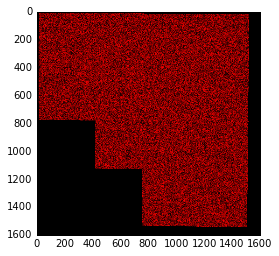

In [6]:
import pylab as py
py.clf()
py.imshow(img)#, aspect='equal')

### Aplpy
Using AplPy to combine into an RGB image.

In [7]:
import aplpy
aplpy.make_rgb_cube(['data/502nmos.fits', 'data/656nmos.fits','data/673nmos.fits'], 'data/nmod_cube.fits')

INFO:astropy:Deleting work directory /tmp/tmpdyBggx


INFO: Deleting work directory /tmp/tmpdyBggx [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /tmp/tmpL0jq7J


: Deleting work directory /tmp/tmpL0jq7J [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /tmp/tmpAB2bQO


: Deleting work directory /tmp/tmpAB2bQO [montage_wrapper.wrappers]


In [11]:
aplpy.make_rgb_image('data/nmod_cube.fits','nmod.png')

INFO:astropy:Red:


INFO: Red: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  2.175e+01 (auto)


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.175e+01 (auto) [aplpy.rgb]
INFO

INFO:astropy:Green:


: Green: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  2.971e+02 (auto)


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.971e+02 (auto) [aplpy.rgb]
INFO

INFO:astropy:Blue:


: Blue: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  7.043e+01 (auto)


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  7.043e+01 (auto) [aplpy.rgb]


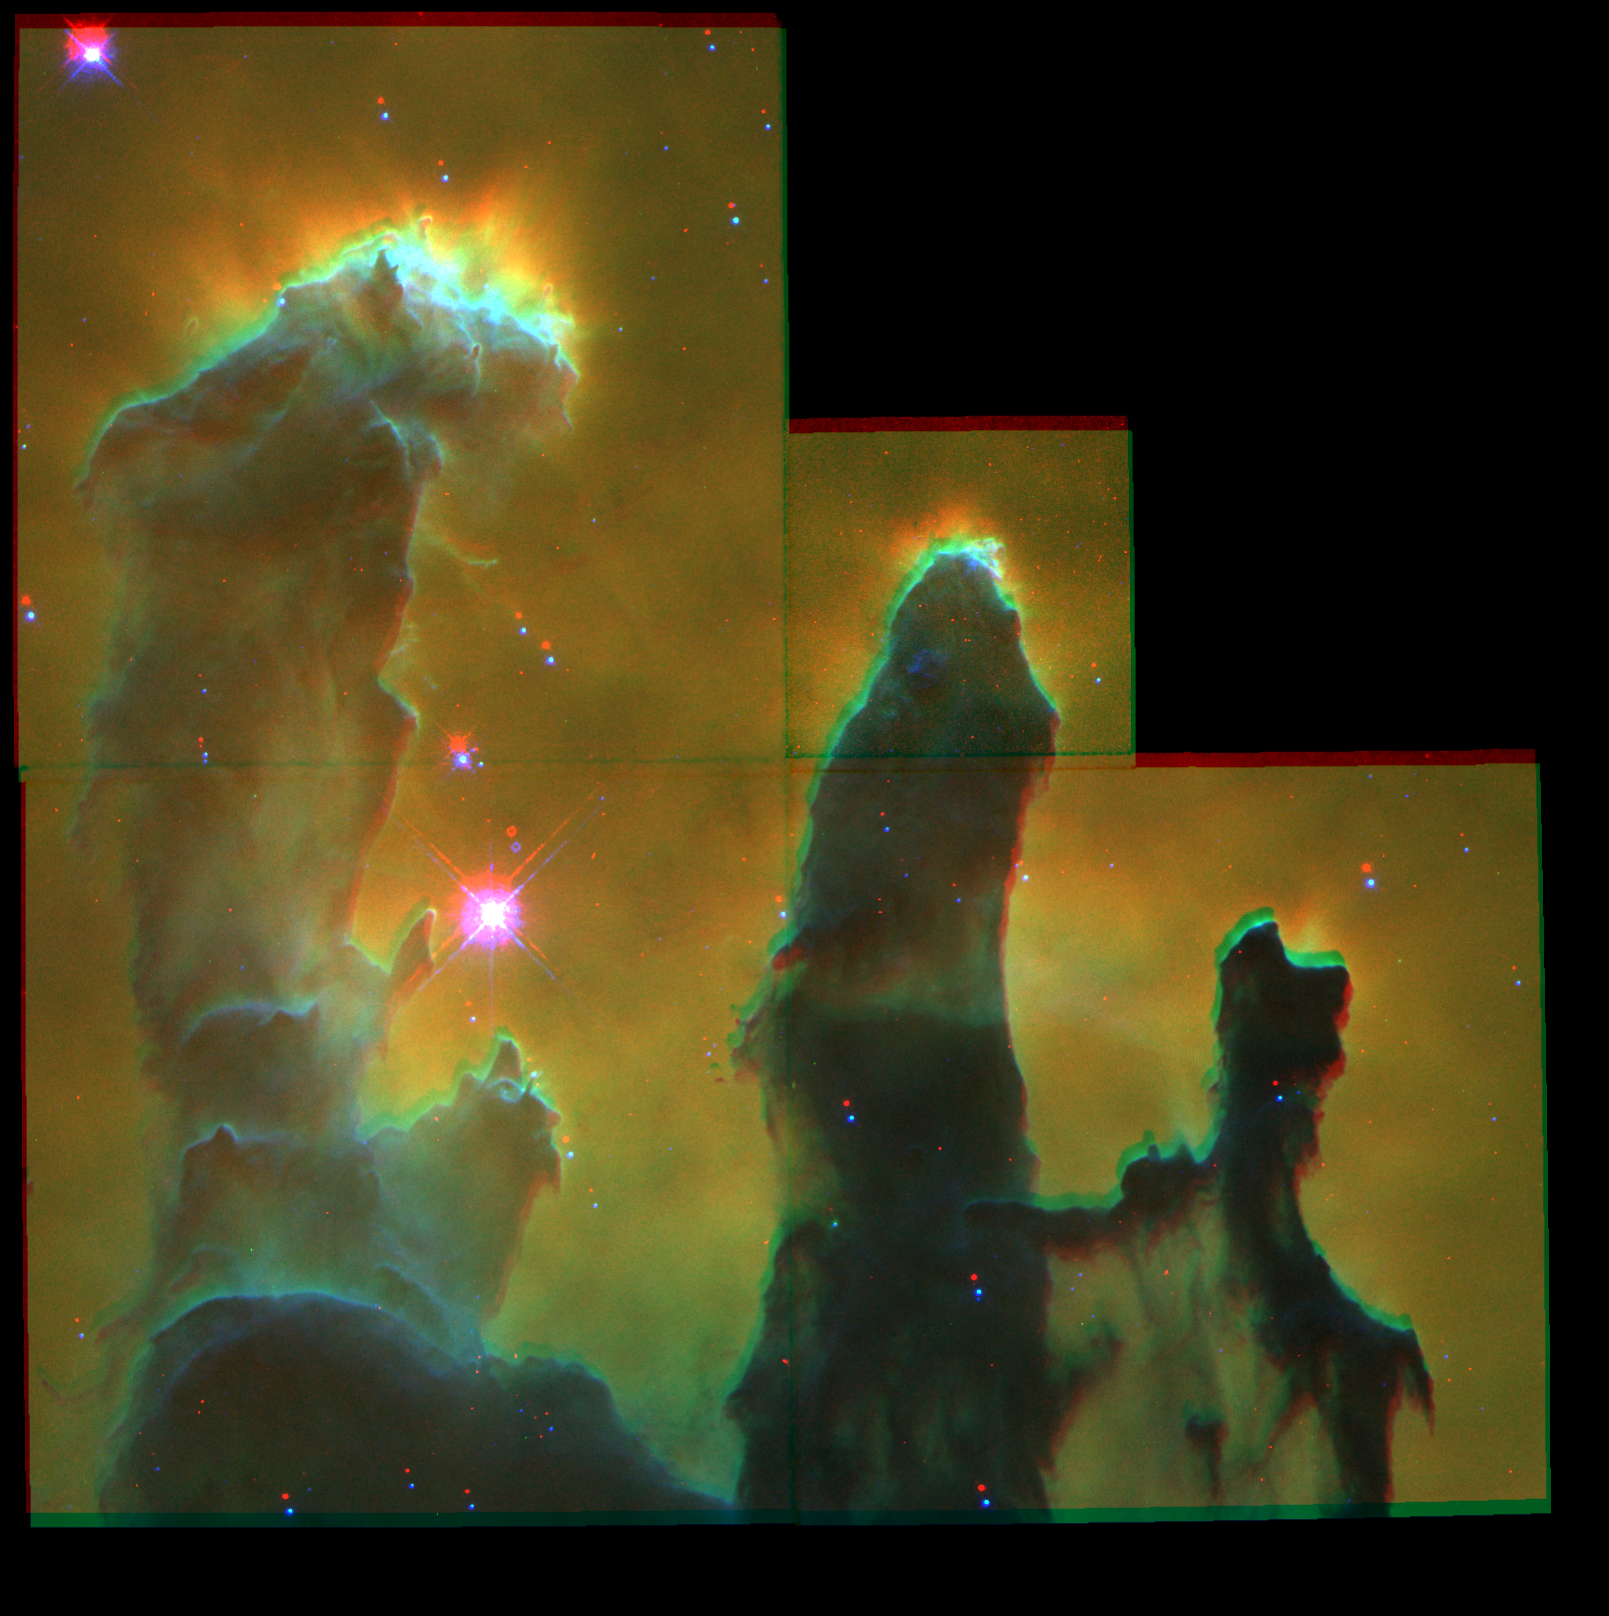

In [18]:
from IPython.display import Image
Image(filename='nmod.png') 


https://github.com/Caltech-IPAC/Montage https://aplpy.github.io/install.html

### Alternative Plotting method
pip install aplpy wcsaxes

In [13]:
from astropy.wcs import WCS
wcs = WCS('data/502nmos.fits')

In [14]:
eagle_OIII = fits.open('data/502nmos.fits')
data = eagle_OIII[0].data

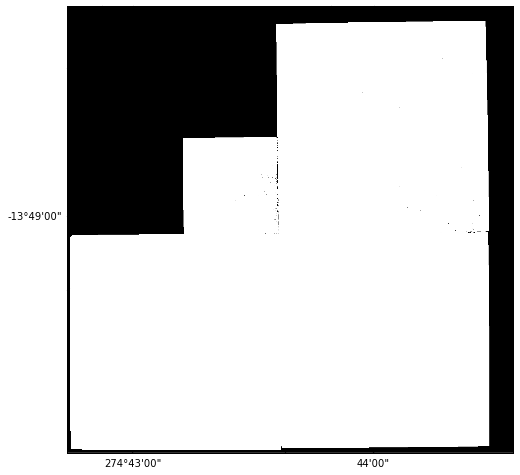

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(data, vmin=0, vmax=1.e-4, origin='lower', cmap=plt.cm.gist_heat)

In [16]:
from reproject import reproject_interp

nmos502 = fits.open('data/502nmos.fits')
nmos656 = fits.open('data/656nmos.fits')

nmos656[0].header

array, footprint = reproject_interp(nmos502[0], nmos656[0].header)

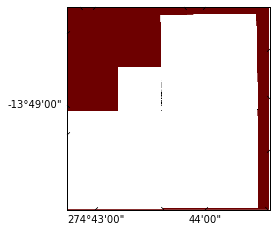

In [17]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(1,2,1, projection=WCS(nmos656[0].header))
ax1.imshow(array, origin='lower',
           vmin=-2.e-4, vmax=5.e-4,
           cmap=plt.cm.gist_heat)


https://www.spacetelescope.org/images/opo9544a/ https://www.spacetelescope.org/projects/fits_liberator/eagledata/
http://hubblesite.org/gallery/behind_the_pictures/meaning_of_color/eagle.php